# Production Model and Insights - Garage Crafters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

import statsmodels.api as sm

In [2]:
train = pd.read_csv('../data/cleaned_data/train_clean.csv')
test = pd.read_csv('../data/cleaned_data/test_clean.csv')

## Focused EDA

In [3]:
def dummies(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)
    
    return df

In [4]:
garage_crafters = train[[ 
'Garage Area',
'Garage Cars',
'Garage Cond',
'Garage Finish',
'Garage Qual',
'Garage Type',
'Garage Yr Blt',
'Gr Liv Area',
'Neighborhood',
'SalePrice'
]]

In [5]:
garage_crafters_dummies = dummies(garage_crafters)

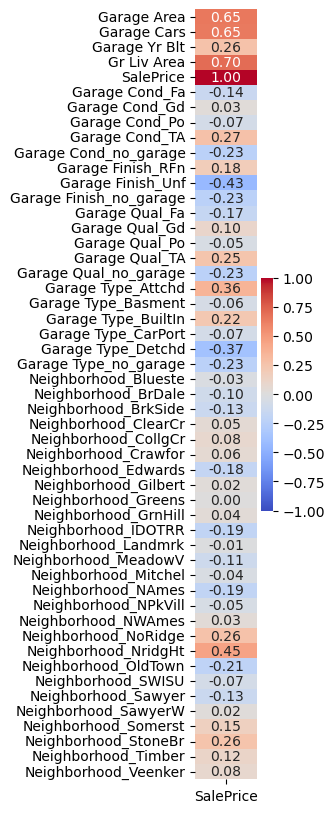

In [6]:
plt.figure(figsize = (1,10))
sns.heatmap(garage_crafters_dummies.corr()[['SalePrice']], cmap='coolwarm', fmt=".2f", vmin= -1, annot=True);

In [7]:
garage_only = garage_crafters.drop('Neighborhood', axis = 1)

In [8]:
garage_only_dummies = dummies(garage_only)

In [9]:
garage_corr = garage_only_dummies.corr()['SalePrice'].sort_values(ascending=False)

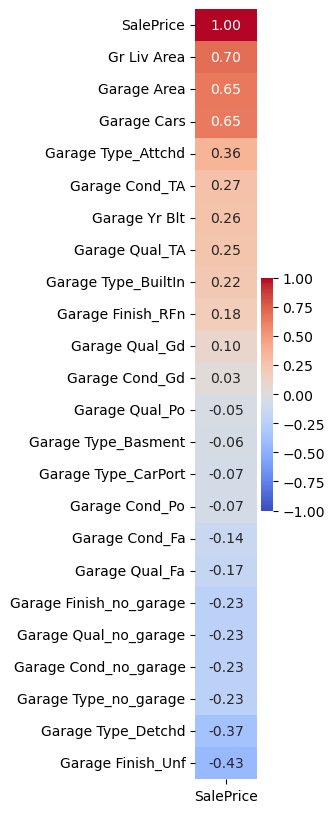

In [10]:
plt.figure(figsize = (1,10))
sns.heatmap(garage_only_dummies[garage_corr.index].corr()[['SalePrice']], cmap='coolwarm', fmt=".2f", vmin= -1, annot=True);

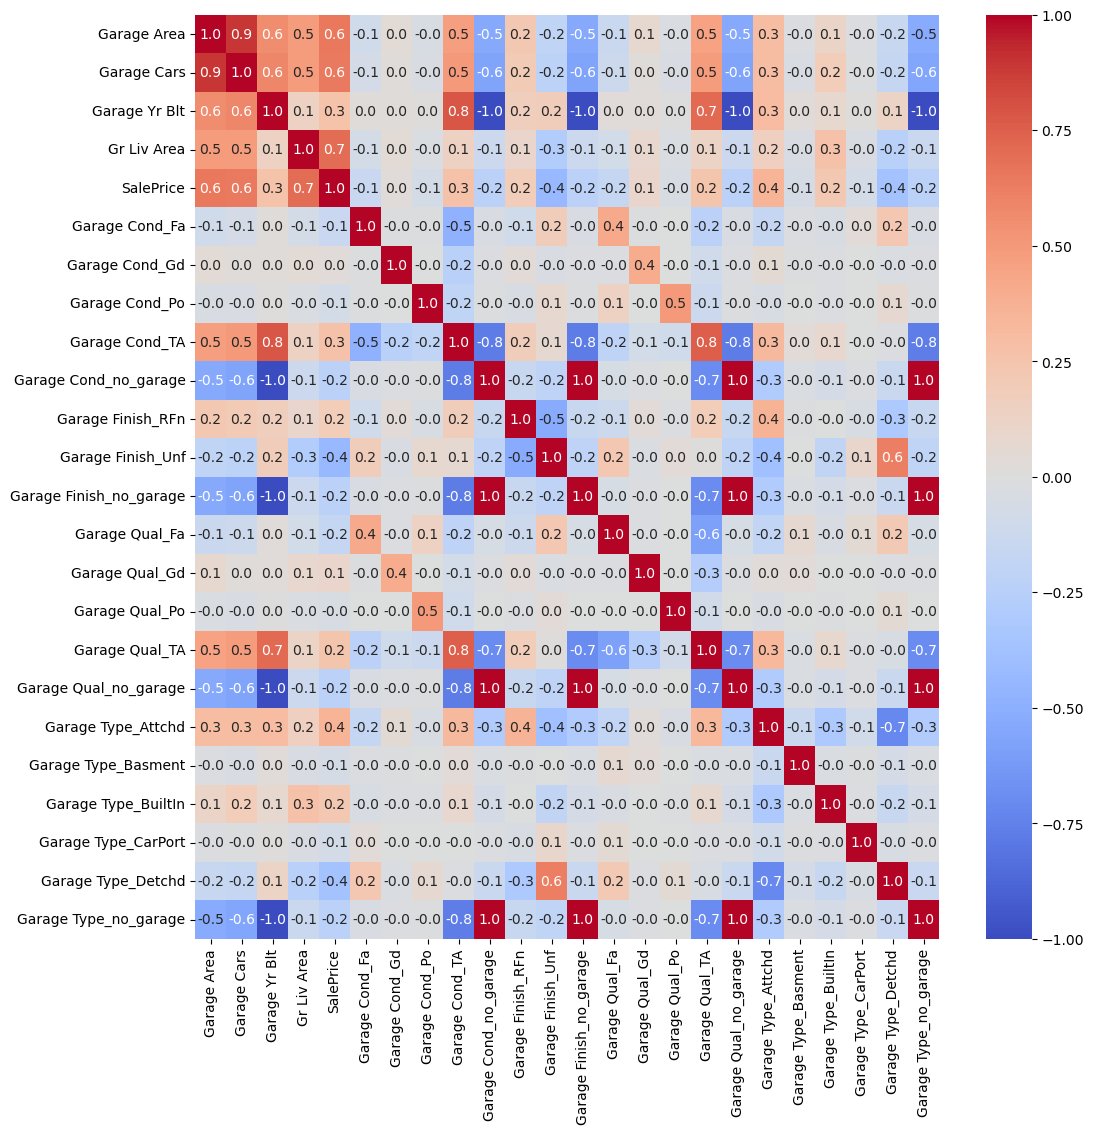

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(garage_only_dummies.corr(), cmap='coolwarm', fmt=".1f", vmin= -1, annot=True);

## Load clean training and test data

In [12]:
train = pd.read_csv('../data/cleaned_data/train_clean.csv')
test = pd.read_csv('../data/cleaned_data/test_clean.csv')

## Predictors and target Variables

In [13]:
predictors = [
    '1st Flr SF',
    '2nd Flr SF',
    'Bedroom AbvGr',
    'Bldg Type',
    'Bsmt Cond',
    'Bsmt Exposure',
    'Bsmt Full Bath',
    'Bsmt Qual',
    'Bsmt Unf SF',
    'BsmtFin SF 1',
    'BsmtFin SF 2',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Central Air',
    'Electrical',
    'Enclosed Porch',
    'Exter Qual',
    'Exter Cond',
    'Fence',
    'Fireplace Qu',
    'Fireplaces',
    'Foundation',
    'Full Bath',
    'Garage Area',
    'Garage Cars',
    'Garage Cond',
    'Garage Finish',
    'Garage Qual',
    'Garage Type',
    'Garage Yr Blt',
    'Gr Liv Area',
    'Half Bath',
    'Heating QC',
    'House Style',
    'Kitchen Qual',
    'Land Contour',
    'Lot Area',
    'Lot Frontage',
    'Lot Shape',
    'MS SubClass',
    'MS Zoning',
    'Mas Vnr Area',
    'Mas Vnr Type',
    'Neighborhood',
    'Open Porch SF',
    'Overall Qual',
    'PID',
    'Paved Drive',
    'Screen Porch',
    'Street',
    'TotRms AbvGrd',
    'Total Bsmt SF',
    'Wood Deck SF',
    'Year Built',
    'Year Remod/Add',
]

## Split data into train and test sets

In [14]:
X = train[predictors]
y = train['SalePrice']

In [15]:
#Renaming no_garage so that the onehotencoder drops this column first
X.replace('no_garage', '0_no_garage', inplace=True)

/var/folders/q7/5h2c80n91kv48jr01119s4t80000gn/T/ipykernel_43558/3881918377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('no_garage', '0_no_garage', inplace=True)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

In [17]:
X_train.shape, y_test.shape

((1640, 55), (411,))

## Column Transformer

In [18]:
X_cat_cols = X.select_dtypes(exclude=['number'])

In [19]:
X_cat_cols_list = X_cat_cols.columns.tolist()

In [20]:
OHE = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

In [21]:
ct = make_column_transformer(
    (OHE, X_cat_cols_list),
    remainder='passthrough'
)

## Transform training and testing data

In [22]:
X_train_ct = ct.fit_transform(X_train)

/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
X_test_ct = ct.transform(X_test)

/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [24]:
column_names = ct.get_feature_names_out()

In [25]:
column_names

array(['onehotencoder__Bldg Type_2fmCon',
       'onehotencoder__Bldg Type_Duplex',
       'onehotencoder__Bldg Type_Twnhs',
       'onehotencoder__Bldg Type_TwnhsE', 'onehotencoder__Bsmt Cond_Fa',
       'onehotencoder__Bsmt Cond_Gd', 'onehotencoder__Bsmt Cond_Po',
       'onehotencoder__Bsmt Cond_TA',
       'onehotencoder__Bsmt Cond_no_basement',
       'onehotencoder__Bsmt Exposure_Gd',
       'onehotencoder__Bsmt Exposure_Mn',
       'onehotencoder__Bsmt Exposure_No',
       'onehotencoder__Bsmt Exposure_no_basement',
       'onehotencoder__Bsmt Qual_Fa', 'onehotencoder__Bsmt Qual_Gd',
       'onehotencoder__Bsmt Qual_Po', 'onehotencoder__Bsmt Qual_TA',
       'onehotencoder__Bsmt Qual_no_basement',
       'onehotencoder__BsmtFin Type 1_BLQ',
       'onehotencoder__BsmtFin Type 1_GLQ',
       'onehotencoder__BsmtFin Type 1_LwQ',
       'onehotencoder__BsmtFin Type 1_Rec',
       'onehotencoder__BsmtFin Type 1_Unf',
       'onehotencoder__BsmtFin Type 1_no_basement',
       'onehot

## Initialize and train Linear Regression Model

In [26]:
model = LinearRegression()
model.fit(X_train_ct, y_train)

LinearRegression()

## Evaluate Model

In [27]:
# scoring model on training set
model.score(X_train_ct, y_train)

0.9093321778070832

In [28]:
#scoring model on testing set
model.score(X_test_ct, y_test)

0.8414247482964184

In [29]:
np.mean(cross_val_score(model, X_test_ct, y_test, cv=5))

0.651204543974039

In [30]:
# setting baseline
y_pred_baseline = [np.mean(y_train)] * len(y_test)

In [31]:
# scoring mean baseline on testing set
r2_score(y_test, y_pred_baseline)

-0.014887741251467856

## Transform and Make Predictions on Unseen Testing Set

In [32]:
test_features = test[predictors]
test_features_ct = ct.transform(test_features)

/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7, 13, 14, 15, 16, 19, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
predictions = model.predict(test_features_ct)

## OLS

In [34]:
X_train_ct_df = pd.DataFrame(X_train_ct, columns=column_names)

In [35]:
y_train.reset_index(drop=True, inplace=True)
X_train_ct_df.reset_index(drop=True, inplace=True)

In [36]:
X_train_ct_df = sm.add_constant(X_train_ct_df)

In [37]:
ols = sm.OLS(y_train, X_train_ct_df).fit()

In [38]:
ols_summary = ols.summary()

In [39]:
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     96.02
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:50:24   Log-Likelihood:                -18888.
No. Observations:                1640   AIC:                         3.809e+04
Df Residuals:                    1484   BIC:                         3.893e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       -6.3e+05   1.83e+05     -3.447      0.001   -9.88e+05   -2.72e+05
onehotencoder__Bldg Type_2fmCon            9131.5841   1.11e+04      0.819      0.413   -1.27e+04     3.1e+04
onehotencoder__Bldg Type_Duplex           -1.392e+04   5723.173     -2.432      0.015   -2.51e+04   -2694.423
onehotencoder__Bldg Type_Twnhs            -2.652e+04   9104.711     -2.913      0.004   -4.44e+04   -8658.506
onehotencoder__Bldg Type_TwnhsE           -1.976e+04   7993.521     -2.472      0.014   -3.54e+04   -4079.299
onehotencoder__Bsmt Cond_Fa               -5669.0083   1.67e+04     -0.340      0.734   -3.84e+04     2.7e+04
onehotencoder__Bsmt Cond_Gd                2214.3137   1.64e+04      0.135      0.893      -3e+04    3.44e+04
onehotencoder__Bsmt Cond_Po               -1287.3015   2.15e+04     -0.060      0.952   -4.34e+04    4.08e+04
onehotencoder__Bsmt Cond_TA                   3.6473   1.61e+04      0.000      1.000   -3.15e+04    3.16e+04
onehotencoder__Bsmt Cond_no_basement      -1251.7864   1.42e+04     -0.088      0.930   -2.92e+04    2.67e+04
onehotencoder__Bsmt Exposure_Gd            1.294e+04   2986.508      4.332      0.000    7080.642    1.88e+04
onehotencoder__Bsmt Exposure_Mn           -9172.5238   3079.324     -2.979      0.003   -1.52e+04   -3132.233
onehotencoder__Bsmt Exposure_No           -8276.5032   2260.372     -3.662      0.000   -1.27e+04   -3842.639
onehotencoder__Bsmt Exposure_no_basement  -1.391e+04   2.59e+04     -0.537      0.591   -6.47e+04    3.68e+04
onehotencoder__Bsmt Qual_Fa               -1.606e+04   5980.831     -2.684      0.007   -2.78e+04   -4323.351
onehotencoder__Bsmt Qual_Gd               -1.614e+04   3294.806     -4.898      0.000   -2.26e+04   -9675.843
onehotencoder__Bsmt Qual_Po               -8603.5639   3.13e+04     -0.275      0.783   -6.99e+04    5.27e+04
onehotencoder__Bsmt Qual_TA                -1.33e+04   4223.059     -3.150      0.002   -2.16e+04   -5017.332
onehotencoder__Bsmt Qual_no_basement      -1251.7835   1.42e+04     -0.088      0.930   -2.92e+04    2.67e+04
onehotencoder__BsmtFin Type 1_BLQ         -1913.8746   2792.984     -0.685      0.493   -7392.491    3564.741
onehotencoder__BsmtFin Type 1_GLQ          1552.7103   2576.812      0.603      0.547   -3501.872    6607.292
onehotencoder__BsmtFin Type 1_LwQ         -8395.2597   3807.273     -2.205      0.028   -1.59e+04    -927.052
onehotencoder__BsmtFin Type 1_Rec         -4419.8626   2952.311     -1.497      0.135   -1.02e+04    1371.284
onehotencoder__BsmtFin Type 1_Unf         -5973.9504   2881.343     -2.073      0.038   -1.16e+04    -322.012
onehotencoder__BsmtFin Type 1_no_basement -1251.7881   1.42e+04     -0.088      0.930   -2.92e+04    2.67e+04
one

In [40]:
#This cell written with the help of ChatGPT
ols_summary_df = pd.read_html(ols_summary.tables[1].as_html(), header=0, index_col=0)[0]

In [41]:
pd.set_option('display.max_rows', None)

In [42]:
ols_summary_df.sort_values(by='coef', ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
onehotencoder__Garage Qual_Ex,150200.000000,37900.00000,3.965,0.000,75900.000000,224000.000000
onehotencoder__Neighborhood_GrnHill,120400.000000,20600.00000,5.833,0.000,79900.000000,161000.000000
onehotencoder__Garage Finish_Fin,72930.000000,44700.00000,1.631,0.103,-14800.000000,161000.000000
onehotencoder__Garage Cond_TA,70150.000000,28200.00000,2.485,0.013,14800.000000,126000.000000
onehotencoder__Garage Finish_Unf,69510.000000,44600.00000,1.557,0.120,-18000.000000,157000.000000
onehotencoder__Garage Finish_RFn,67860.000000,44600.00000,1.520,0.129,-19700.000000,155000.000000
onehotencoder__Garage Cond_Po,66820.000000,29100.00000,2.299,0.022,9803.589000,124000.000000
onehotencoder__Garage Cond_Gd,64560.000000,28800.00000,2.238,0.025,7978.378000,121000.000000
onehotencoder__Garage Cond_Fa,63700.000000,28000.00000,2.272,0.023,8708.046000,119000.000000
onehotencoder__Garage Qual_Gd,54060.000000,29500.00000,1.833,0.067,-3798.064000,112000.000000
